In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [24]:
all_tests = {}
all_times = {}

In [25]:
#all_sizes = [128, 256, 512, 768, 1024, 1280, 1536, 1792, 2048, 2560, 2816,  3072, 3414, 3756, 4096]
all_sizes = [64, 128, 256, 512, 1024, 2048]
#all_sizes = [4]

In [38]:
for n in all_sizes:
    print("Testing size: ", n)
    all_times[n] = []
    a = -10
    b = 10
    tests = []
    for w in range(3):
        print(f'Test {w + 1}: ')
        tests.append(np.random.random((n, n)) * (b - a) + a)
        my_file = open("test.txt", "w")
        for i in range(n):
            for j in range(n):
                my_file.write(str(tests[w][i][j]) + " ")
        my_file.close()
        
        os.system(f'./main {n}')
        
        numbers = open('res_test.txt','r').read().split()
        Anumbers = list(map(float, numbers[: n * n]))
        Unumbers = list(map(float, numbers[n * n : 2 * n * n]))
        Vnumbers = list(map(float, numbers[2 * n * n : 3 * n * n]))
        Bnumbers = list(map(float, numbers[3 * n * n : 4 * n * n]))
        A = np.array(Anumbers).reshape(n, n)
        U = np.array(Unumbers).reshape(n, n)
        V = np.array(Vnumbers).reshape(n, n)
        B = np.array(Bnumbers).reshape(n, n)
        '''
        print(A)
        print()
        print(V)
        print()
        print(U)
        print()
        print(B)
        print()
        print(A @ V)
        print()
        print(U @ B)
        '''
        time = numbers[4 * n * n]
        
        print("Frob: ", np.linalg.norm(A @ V - U @ B))
        print(int(time) / 1000000000)
        all_times[n].append(time)
    print("\n")
        
    all_tests[n] = tests
        
        

Testing size:  64
Test 1: 
Frob:  0.0009389290723428225
0.000922648
Test 2: 
Frob:  0.000943886674829338
0.000515031
Test 3: 
Frob:  0.0009411340189192275
0.000513123


Testing size:  128
Test 1: 
Frob:  0.0020629995223485366
0.004903919
Test 2: 
Frob:  0.002058911451071231
0.009454873
Test 3: 
Frob:  0.0020605377297914533
0.008869736


Testing size:  256
Test 1: 
Frob:  0.004299184796023639
0.055604213
Test 2: 
Frob:  0.004302138134013355
0.067508877
Test 3: 
Frob:  0.004312310493112109
0.060236778


Testing size:  512
Test 1: 
Frob:  0.010892018312270092
0.579050456
Test 2: 
Frob:  0.011039169545197406
0.635003117
Test 3: 
Frob:  0.010809780084887562
0.656854456


Testing size:  1024
Test 1: 
Frob:  0.015814981078122518
15.187324904
Test 2: 
Frob:  0.015913900054757256
10.194827118
Test 3: 
Frob:  0.01587760026771931
9.386926318


Testing size:  2048
Test 1: 
Frob:  0.028829966858924642
212.009921936
Test 2: 


: 

: 

In [17]:
all_times = {
    64 : [3946084, 4202051, 2283507],
    128 : [21198393, 17488742, 17247967],
    256 : [188818009, 254649590, 186250291],
    512 : [1900671553, 1841102398, 1681651837],
    1024 : [15258008716, 15196214759, 15183231358],
    2048 : [113480545109, 114161705067, 112555594873],
}

In [31]:
for i in all_times:
    all_times[i] = [int(el) for el in all_times[i]]


In [32]:
all_times

{64: [590812],
 128: [5000786],
 256: [61127049],
 512: [631061603],
 1024: [10001929602],
 2048: [212017575318]}

In [33]:
x = np.array(all_sizes)
y = np.array([np.array(all_times[i]).mean() for i in all_sizes])

In [34]:
x

array([  64,  128,  256,  512, 1024, 2048])

In [35]:
y = y / 1000000000
np.round(y, 5)

array([5.9000000e-04, 5.0000000e-03, 6.1130000e-02, 6.3106000e-01,
       1.0001930e+01, 2.1201758e+02])

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = (x ** 3).reshape(-1, 1)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)
y_predicted

array([ -3.64604337,  -3.6003164 ,  -3.23450067,  -0.30797479,
        23.10423221, 210.4018882 ])

[2.49192193e-08]


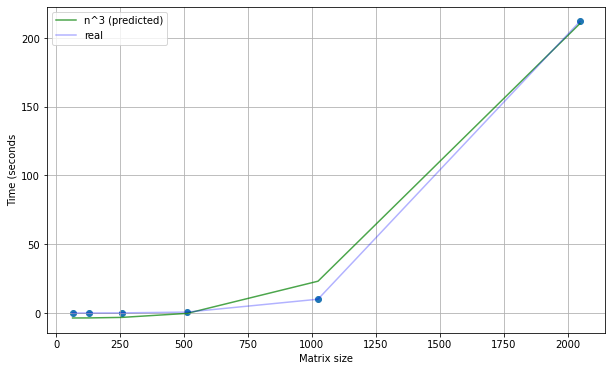

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(x, y)
ax.plot(x, y_predicted, color='green', label = 'n^3 (predicted)', alpha=0.7)
ax.plot(x, y, color='blue', label = 'real', alpha=0.3)
ax.grid()

ax.set_xlabel('Matrix size')
ax.set_ylabel('Time (seconds')
ax.legend()
plt.savefig('plot.png')
print(poly_reg_model.coef_)